In [51]:
# Load essential libraries
import csv
import numpy as np
import matplotlib.pyplot as plt
import statistics 
import numpy as np
from scipy.signal import butter, lfilter, freqz
from IPython.display import Image

from datetime import datetime

In [52]:
# File loading from relative path
file = '../Data/20200915-china.csv'

In [53]:
# Figure initialization
fig = plt.figure()

# Time and robot egomotion
time = []
standardized_time = []
compass_heading = []
speed = []

# sonde data
temp = []
PH = []
cond = [] # ms
chlorophyll = [] 
ODO = [] # mg/L
sonar = []
angular_z = []

<Figure size 432x288 with 0 Axes>

In [54]:
initial_time = None

with open(file, 'r') as csvfile:
    csvreader= csv.reader(csvfile, delimiter=',')
    header = next(csvreader)
    for row in csvreader:
        # robot data
        if initial_time is None:
            initial_time = float(row[0])
        
        current_time = float(row[0])
        
        if current_time - initial_time >= 700 and current_time - initial_time < 1000:
            time.append(float(row[0]))
            compass_heading.append(float(row[4]))
            speed.append(float(row[10]))
            angular_z.append(float(row[18]))

            # sonde data
            temp.append(float(row[23]))
            PH.append(float(row[26]))
            cond.append(float(row[25]))
            chlorophyll.append(float(row[29]))
            ODO.append(float(row[31]))
            sonar.append(float(row[8]))
    

    minimum_time = min(time)
    for time_stamp in time:
        standardized_time.append(time_stamp - minimum_time)
    

In [ ]:
# collision time around 90

### Compass heading

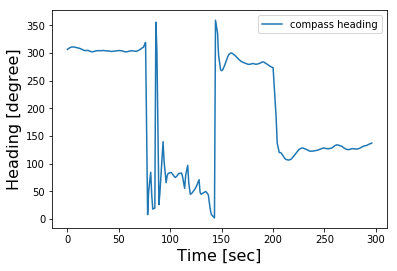

In [45]:
plt.plot(standardized_time, compass_heading, label='compass heading')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Heading [degree]', fontsize=16)
plt.legend()
plt.show()

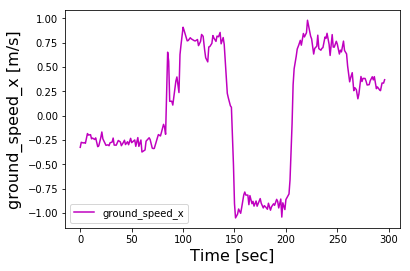

In [46]:
plt.plot(standardized_time, speed, label='ground_speed_x', color='m')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('ground_speed_x [m/s]', fontsize=16)
plt.legend()
#plt.show()

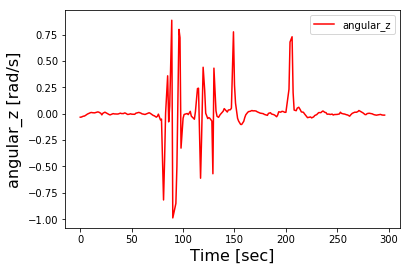

In [55]:
plt.plot(standardized_time, angular_z, label='angular_z', color='r')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('angular_z [rad/s]', fontsize=16)
plt.legend()
#plt.show()

### Temperature

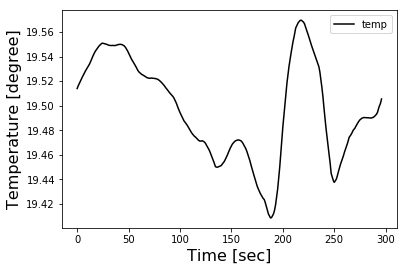

In [47]:
plt.plot(standardized_time, temp, label='temp', color='k')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Temperature [degree]', fontsize=16)
plt.legend()
plt.show()

### PH

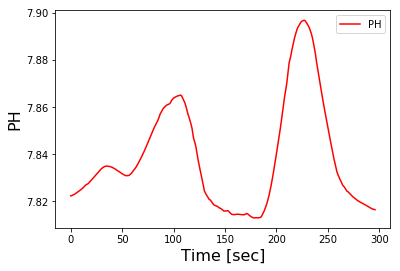

In [48]:
plt.plot(standardized_time, PH, label='PH', color='r')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('PH', fontsize=16)
plt.legend()
plt.show()

### Conductivity
* around time 1000, catabot hit another boat

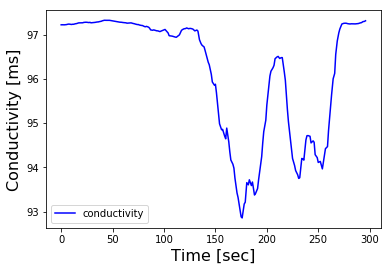

In [49]:
plt.plot(standardized_time, cond, label='conductivity', color='b')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('Conductivity [ms]', fontsize=16)
plt.legend()
plt.show()

### Chlorophyll 
* around time 1000, catabot hit another boat

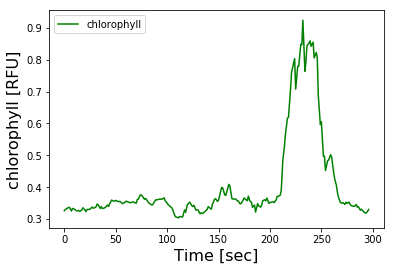

In [50]:
plt.plot(standardized_time, chlorophyll, label='chlorophyll', color='g')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('chlorophyll [RFU]', fontsize=16)
plt.legend()
plt.show()

### ODO

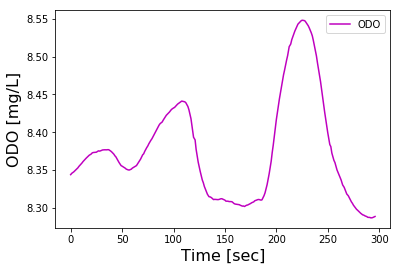

In [56]:
plt.plot(standardized_time, ODO, label='ODO', color='m')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('ODO [mg/L]', fontsize=16)
plt.legend()
plt.show()

### Sonar depth

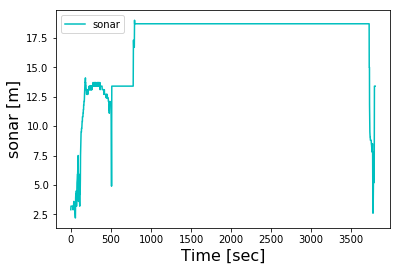

In [11]:
plt.plot(standardized_time, sonar, label='sonar', color='c')
plt.xlabel('Time [sec]', fontsize=16)
plt.ylabel('sonar [m]', fontsize=16)
plt.legend()
plt.show()